<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_3/Assignment_3/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [ ]:
type(iris)

pandas.core.frame.DataFrame

In [ ]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
110,6.5,3.2,5.1,2.0,virginica
78,6.0,2.9,4.5,1.5,versicolor
122,7.7,2.8,6.7,2.0,virginica
132,6.4,2.8,5.6,2.2,virginica
136,6.3,3.4,5.6,2.4,virginica
133,6.3,2.8,5.1,1.5,virginica
84,5.4,3.0,4.5,1.5,versicolor
83,6.0,2.7,5.1,1.6,versicolor
45,4.8,3.0,1.4,0.3,setosa
82,5.8,2.7,3.9,1.2,versicolor


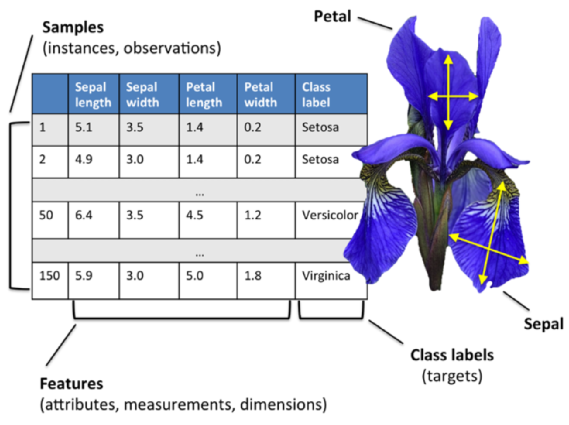

In [ ]:
import pandas as pd

In [ ]:
pd.value_counts(iris.species)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

> # **Exploratory Analysis through Charts**



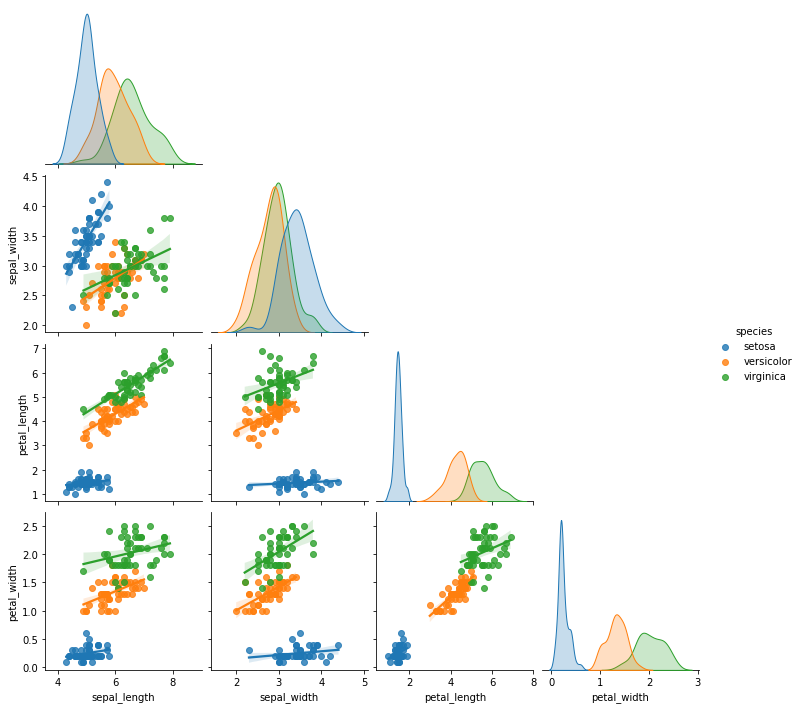

In [ ]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

# **MACHINE LEARNING - Predictive Analysis**


In [ ]:
train = iris.sample(frac=0.7, random_state=500) # random state is a seed value

In [ ]:
test = iris.drop(train.index)

In [ ]:
X_train = train.drop(labels='species', axis=1)

In [ ]:
y_train = train.species

In [ ]:
X_test = test.drop(labels='species', axis=1)

In [ ]:
y_test = test.species



> Follows the option to use the train_test_split: simple, one line code:

>>>**from** sklearn.model_selection **import** train_test_split

>>>X_train,  X_test,  y_train,  y_test = train_test_split ( iris.drop ( 'species' ,axis = 1 ) , iris [ 'species' ] , test_size = 0.3, random_state = 1 )

In [ ]:
print(X_train.head(),"\n", y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
126           6.2          2.8           4.8          1.8
136           6.3          3.4           5.6          2.4
133           6.3          2.8           5.1          1.5
66            5.6          3.0           4.5          1.5 
 7          setosa
126     virginica
136     virginica
133     virginica
66     versicolor
Name: species, dtype: object


In [ ]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [ ]:
y_train.shape,y_test.shape

((105,), (45,))

# **KNN - K Nearest Neighbors***



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test,y_test)

0.9555555555555556

In [ ]:
results = knn.predict(X_test)

># **Validation**


In [ ]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted   setosa  versicolor  virginica  total
Real                                            
setosa          12           0          0     12
versicolor       0          20          2     22
virginica        0           0         11     11
total           12          20         13     45


In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        12
  versicolor      1.000     0.909     0.952        22
   virginica      0.846     1.000     0.917        11

    accuracy                          0.956        45
   macro avg      0.949     0.970     0.956        45
weighted avg      0.962     0.956     0.956        45



# **Acknowledgment**

This article had the collaboration of some data scientist colleagues:

*   Karinne Cristina, [Tutor of Minerando's Data Science do Zero](https://www.linkedin.com/in/rodrigo-santana-ferreira-0ab041128/)
*   Maykon Schots, [Data Scientist at Volvo Group](https://www.linkedin.com/in/maykon-schots-a543b49/)
*   Plínio Mendes, [Software Engineer at Google](https://www.linkedin.com/in/pliniofm/)
*   Rodringo Santana, [Co-Founder of Minerando Dados](https://www.linkedin.com/in/rodrigo-santana-ferreira-0ab041128/)



